<a href="https://colab.research.google.com/github/ImenMasmoudiEm/CCKInternshipProject/blob/main/CCKProject_Balanced_Ensemblist_Methode09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
import pandas as pd

os.chdir('/content/drive/MyDrive/All/Projects/Ing Internship/Data')
data=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/final-dataset.xlsx")
data['classe']=data['classe'].replace("hate", int(2))
data['classe']=data['classe'].replace("normal", int(0)) 
data['classe']=data['classe'].replace("abusive", int(1))

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sentences = data['commentaire']
labels = data['classe']

labels = [int(i) for i in labels]

def count_words(input):
  return len(input.split())
max_length=count_words(max(sentences,key=count_words))
max_length

388

In [4]:
data12=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset1and2.xlsx")
data34=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset3and4.xlsx")
data5=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/D5.xlsx")

data12['classe']=data12['classe'].replace("hate", int(2))
data12['classe']=data12['classe'].replace("normal", int(0)) 
data12['classe']=data12['classe'].replace("abusive", int(1))

data34['classe']=data34['classe'].replace("hate", int(2))
data34['classe']=data34['classe'].replace("normal", int(0)) 
data34['classe']=data34['classe'].replace("abusive", int(1))


data5['classe']=data5['classe'].replace("hate", int(2))
data5['classe']=data5['classe'].replace("normal", int(0)) 
data5['classe']=data5['classe'].replace("abusive", int(1))


C1=data12["commentaire"]
C2=data34["commentaire"]
C3=data5["commentaire"]
L1=data12["classe"]
L2=data34["classe"]
L3=data5["classe"]


data12=[[i,j] for i,j in zip(C1 , L1)]
data34=[[i,j] for i,j in zip(C2 , L2)]
data5=[[i,j] for i,j in zip(C3 , L3)]

data12=pd.DataFrame(data12,columns=["sentences","classe"])
data34=pd.DataFrame(data34,columns=["sentences","classe"])
data5=pd.DataFrame(data5,columns=["sentences","classe"])

In [5]:
training_size=int(len(sentences)*0.9)   #Experimenting setup

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

embedding_dim = 16

tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

vocab_size = len(tokenizer.word_index) + 1 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [6]:
Nsentences12=data12["sentences"]
Nlabels12=data12["classe"]

training_size12=int(len(Nsentences12)*0.8)

testing_sentences12 = Nsentences12[training_size12:]
testing_labels12 = Nlabels12[training_size12:]

##########

Nsentences34=data34["sentences"]
Nlabels34=data34["classe"]

training_size34=int(len(Nsentences34)*0.8)

testing_sentences34 = Nsentences34[training_size34:]
testing_labels34 = Nlabels34[training_size34:]

##########

Nsentences5=data5["sentences"]
Nlabels5=data5["classe"]

training_size5=int(len(Nsentences5)*0.8)

testing_sentences5 = Nsentences34[training_size5:]
testing_labels5 = Nlabels34[training_size5:]

####################

testing_sequences12 = tokenizer.texts_to_sequences(testing_sentences12)
testing_padded12 = pad_sequences(testing_sequences12, maxlen=max_length, padding='post', truncating='post')

###########

testing_sequences34 = tokenizer.texts_to_sequences(testing_sentences34)
testing_padded34 = pad_sequences(testing_sequences34, maxlen=max_length, padding='post', truncating='post')

###########

testing_sequences5 = tokenizer.texts_to_sequences(testing_sentences5)
testing_padded5 = pad_sequences(testing_sequences5, maxlen=max_length, padding='post', truncating='post')

#ECOC Algorithm: Classification multi-classes

##First Decomposition: A=0+1 , B=2
##Second Decomposition: A=0+2 , B=1
##Third Decomposition: A=1+2 , B=0
##A-->1 , B-->0

In [7]:
training_padded1 = np.asarray(training_padded).astype(np.int)
training_labels1 = np.asarray(training_labels).astype(np.int)
testing_padded1 = np.asarray(testing_padded).astype(np.int)
testing_labels1 = np.asarray(testing_labels).astype(np.int)

training_labels1 = np.expand_dims(training_labels, axis=1)
testing_labels1 = np.expand_dims(testing_labels, axis=1)


for i in range(len(training_labels1)):
  if training_labels1[i]==0:
    training_labels1[i]=1
  elif training_labels1[i]==2:
    training_labels1[i]=0

for i in range(len(testing_labels1)):
  if testing_labels1[i]==0:
    testing_labels1[i]=1
  elif testing_labels1[i]==2:
    testing_labels1[i]=0
 
#**********

training_padded2 = training_padded1 
training_labels2 = np.asarray(training_labels).astype(np.int)
testing_padded2 = testing_padded1
testing_labels2 = np.asarray(testing_labels).astype(np.int)

training_labels2 = np.expand_dims(training_labels, axis=1)
testing_labels2 = np.expand_dims(testing_labels, axis=1)


for i in range(len(training_labels2)):
  if training_labels2[i]==1:
    training_labels2[i]=0
  else:
    training_labels2[i]=1


for i in range(len(testing_labels2)):
  if testing_labels2[i]==1:
    testing_labels2[i]=0
  else:
    testing_labels2[i]=1

#**********

training_padded3 = training_padded1 
training_labels3 = np.asarray(training_labels).astype(np.int)
testing_padded3 = testing_padded1
testing_labels3 = np.asarray(testing_labels).astype(np.int)

training_labels3 = np.expand_dims(training_labels, axis=1)
testing_labels3 = np.expand_dims(testing_labels, axis=1)


for i in range(len(training_labels3)):
  if training_labels3[i]==2:
    training_labels3[i]=1

for i in range(len(testing_labels3)):
  if testing_labels3[i]==2:
    testing_labels3[i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [8]:
training_labels1Y=training_labels1.reshape(20729)
training_labels2Y=training_labels2.reshape(20729)
training_labels3Y=training_labels3.reshape(20729)

In [9]:
import pandas as pd

data1=[[i,j] for i,j in zip(training_padded1  , training_labels1Y)]
data2=[[i,j] for i,j in zip(training_padded1  , training_labels2Y)]
data3=[[i,j] for i,j in zip(training_padded1  , training_labels3Y)]

data1=pd.DataFrame(data1,columns=["sentences","classe"])
data2=pd.DataFrame(data2,columns=["sentences","classe"])
data3=pd.DataFrame(data3,columns=["sentences","classe"])

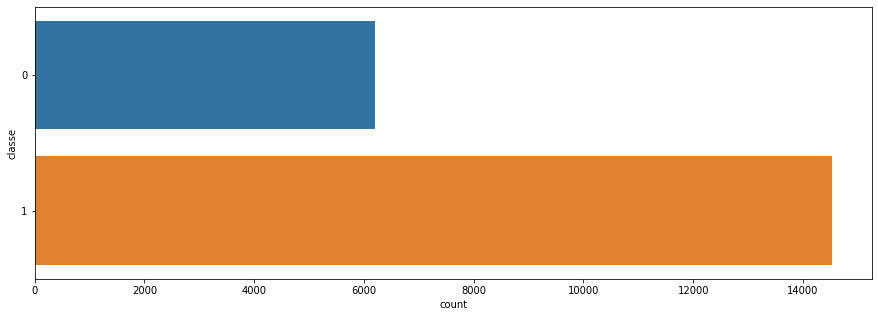

classe
0    6205
Name: classe, dtype: int64
classe
1    14524
Name: classe, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data1)
plt.show()
print(data1.loc[data1.classe==0].groupby('classe')["classe"].count())
print(data1.loc[data1.classe==1].groupby('classe')["classe"].count())

In [11]:
#To Balence our data
S0=[]
L0=[]
S1=[]
L1=[]
for i in range(len(data1)):
  if data1['classe'][i]==1:
    S1.append(np.asarray(data1['sentences'][i]))
    L1.append(1)
  else:
    S0.append(np.asarray(data1['sentences'][i]))
    L0.append(0)
S1=S1[:6205]
L1=L1[:6205]

S=[]
L=[]
for i in range(6205):
  S.append(S0[i])
  S.append(S1[i])
  L.append(0)
  L.append(1)
S=np.asarray(S)
data1=[[i,j] for i,j in zip(S  , L)]
data1=pd.DataFrame(data1,columns=["sentences","classe"])
training_padded1=S

In [12]:
np.shape(S)

(12410, 388)

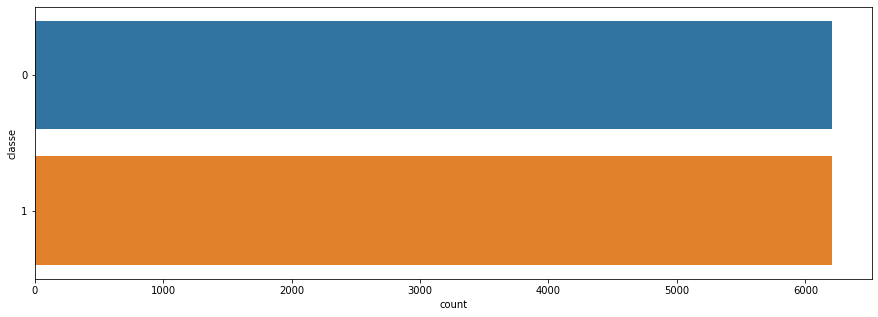

classe
0    6205
Name: classe, dtype: int64
classe
1    6205
Name: classe, dtype: int64


In [13]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data1)
plt.show()
print(data1.loc[data1.classe==0].groupby('classe')["classe"].count())
print(data1.loc[data1.classe==1].groupby('classe')["classe"].count())

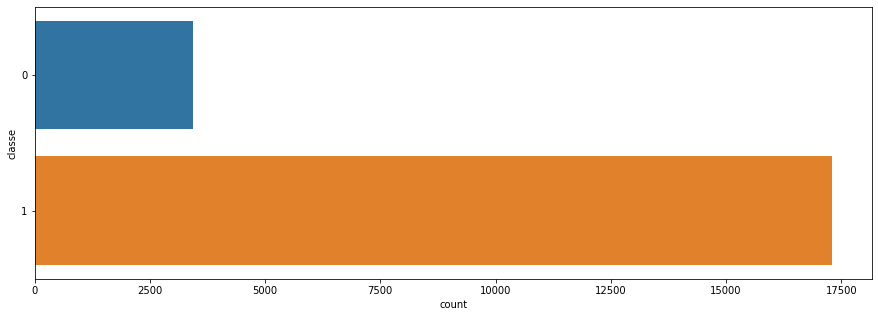

classe
0    3436
Name: classe, dtype: int64
classe
1    17293
Name: classe, dtype: int64


In [14]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data2)
plt.show()
print(data2.loc[data2.classe==0].groupby('classe')["classe"].count())
print(data2.loc[data2.classe==1].groupby('classe')["classe"].count())

In [15]:
#To Balence our data2
S0=[]
L0=[]
S1=[]
L1=[]
for i in range(len(data2)):
  if data2['classe'][i]==1:
    S1.append(data2['sentences'][i])
    L1.append(1)
  else:
    S0.append(data2['sentences'][i])
    L0.append(0)
S1=S1[:3052]
L1=L1[:3052]

S=[]
L=[]
for i in range(3052):
  S.append(S0[i])
  S.append(S1[i])
  L.append(0)
  L.append(1)
S=np.asarray(S)
data2=[[i,j] for i,j in zip(S  , L)]
data2=pd.DataFrame(data2,columns=["sentences","classe"])
training_padded2=S

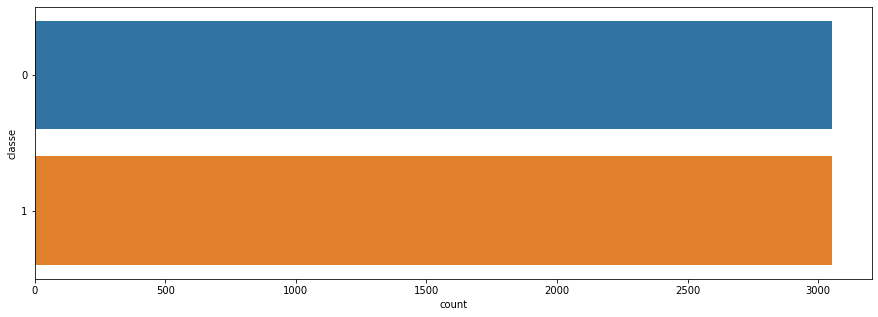

classe
0    3052
Name: classe, dtype: int64
classe
1    3052
Name: classe, dtype: int64


In [16]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data2)
plt.show()
print(data2.loc[data2.classe==0].groupby('classe')["classe"].count())
print(data2.loc[data2.classe==1].groupby('classe')["classe"].count())

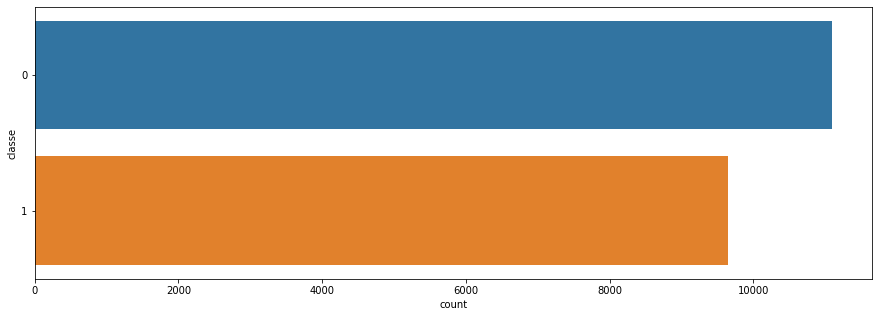

classe
0    11088
Name: classe, dtype: int64
classe
1    9641
Name: classe, dtype: int64


In [17]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data3)
plt.show()
print(data3.loc[data3.classe==0].groupby('classe')["classe"].count())
print(data3.loc[data3.classe==1].groupby('classe')["classe"].count())

In [18]:
#To Balence our data3
S0=[]
L0=[]
S1=[]
L1=[]
for i in range(len(data3)):
  if data3['classe'][i]==1:
    S1.append(data3['sentences'][i])
    L1.append(1)
  else:
    S0.append(data3['sentences'][i])
    L0.append(0)
S0=S0[:9641]
L0=L0[:9641]

S=[]
L=[]
for i in range(9641):
  S.append(S0[i])
  S.append(S1[i])
  L.append(0)
  L.append(1)
S=np.asarray(S)
data3=[[i,j] for i,j in zip(S  , L)]
data3=pd.DataFrame(data3,columns=["sentences","classe"])
training_padded3=S

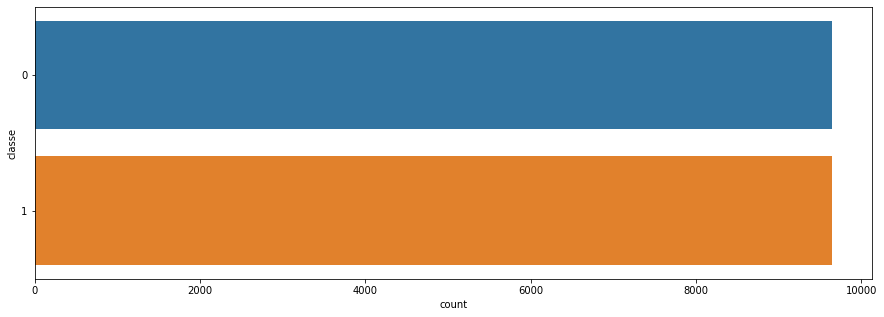

classe
0    9641
Name: classe, dtype: int64
classe
1    9641
Name: classe, dtype: int64


In [19]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data3)
plt.show()
print(data3.loc[data3.classe==0].groupby('classe')["classe"].count())
print(data3.loc[data3.classe==1].groupby('classe')["classe"].count())

In [20]:
#training_padded1=np.asarray(data1['sentences']).reshape(12410,388)
training_labels1=np.asarray(data1['classe']).astype('float32')
#training_padded2=np.asarray(data2['sentences'])
training_labels2=np.asarray(data2['classe']).astype('float32')
#training_padded3=np.asarray(data3['sentences'])
training_labels3=np.asarray(data3['classe']).astype('float32')

In [21]:
import tensorflow as tf

model1=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dropout(0.3),
                                   tf.keras.layers.Dense(units=24,activation='relu'),
                                   tf.keras.layers.Dense(units=1, activation='sigmoid')])

model2=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dropout(0.3),
                                   tf.keras.layers.Dense(units=24,activation='relu'),
                                   tf.keras.layers.Dense(units=1, activation='sigmoid')])

model3=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=24,activation='relu'),
                                   tf.keras.layers.Dense(units=1, activation='sigmoid')])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 388, 16)           845584    
                                                                 
 conv1d (Conv1D)             (None, 384, 128)          10368     
                                                                 
 conv1d_1 (Conv1D)           (None, 384, 32)           4128      
                                                                 
 bidirectional (Bidirectiona  (None, 384, 64)          16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 384, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 384, 32)          1

In [22]:
model1.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)
history1 = model1.fit(training_padded1, training_labels1, batch_size=128, epochs=35, validation_data=(testing_padded1, testing_labels1), verbose=1)

model2.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)
history2 = model2.fit(training_padded2, training_labels2, batch_size=128, epochs=35, validation_data=(testing_padded2, testing_labels2), verbose=1)

#model3.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)
#history3 = model3.fit(training_padded3, training_labels3, batch_size=128, epochs=35, validation_data=(testing_padded3, testing_labels3), verbose=1)

Epoch 1/35
97/97 [==============================] - 26s 135ms/step - loss: 0.6922 - accuracy: 0.5089 - val_loss: 0.6748 - val_accuracy: 0.5039
Epoch 2/35
97/97 [==============================] - 13s 132ms/step - loss: 0.5770 - accuracy: 0.7081 - val_loss: 0.8868 - val_accuracy: 0.4831
Epoch 3/35
97/97 [==============================] - 13s 134ms/step - loss: 0.4308 - accuracy: 0.8094 - val_loss: 1.1138 - val_accuracy: 0.5221
Epoch 4/35
97/97 [==============================] - 13s 136ms/step - loss: 0.3710 - accuracy: 0.8437 - val_loss: 1.3733 - val_accuracy: 0.5516
Epoch 5/35
97/97 [==============================] - 13s 136ms/step - loss: 0.3251 - accuracy: 0.8683 - val_loss: 1.5428 - val_accuracy: 0.5438
Epoch 6/35
97/97 [==============================] - 13s 135ms/step - loss: 0.2841 - accuracy: 0.8877 - val_loss: 1.7414 - val_accuracy: 0.5790
Epoch 7/35
40/97 [===========>..................] - ETA: 6s - loss: 0.2336 - accuracy: 0.9105

KeyboardInterrupt: ignored

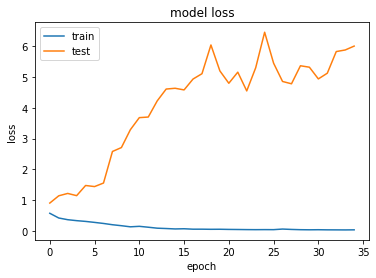

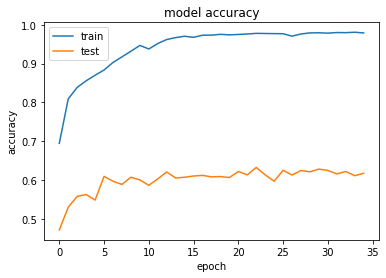

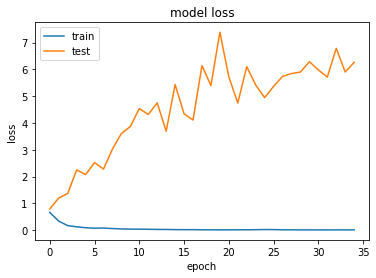

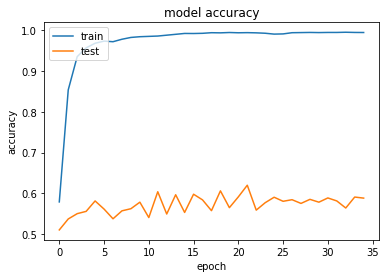

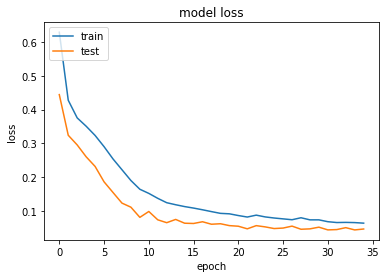

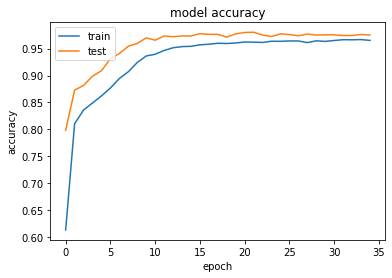

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
L1=model1.predict(testing_padded)
L2=model2.predict(testing_padded)
L3=model3.predict(testing_padded)

for i in range(len(L1)):
  if (L1[i]<0.5):
    L1[i]=0
  else:
    L1[i]=1
  if (L2[i]<0.5):
    L2[i]=0
  else:
    L2[i]=1
  if (L3[i]<0.5):
    L3[i]=0
  else:
    L3[i]=1
P=[]
for i in range(len(L1)):
  P.append(str(int(L1[i][0]))+str(int(L2[i][0]))+str(int(L3[i][0])))

print(P[2])

010


In [ ]:
def hamming_distance(string1, string2):
	dist_counter = 0
	for n in range(len(string1)):
		if string1[n] != string2[n]:
			dist_counter += 1
	return dist_counter

pred=[]
for i in range(len(P)):
  if (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'110')):
    pred.append(0)
  elif (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'101')):
    pred.append(1)
  else:
    pred.append(2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(testing_labels, pred)
print("For the Ensemblist methode: \n",cm)
print(classification_report(testing_labels, pred, labels=[0,1,2]))

For the Ensemblist methode: 
 [[1262    0    3]
 [  17  396    1]
 [  38  252  335]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1265
           1       0.61      0.96      0.75       414
           2       0.99      0.54      0.70       625

    accuracy                           0.87      2304
   macro avg       0.85      0.83      0.81      2304
weighted avg       0.90      0.87      0.86      2304



In [ ]:
model1.save("BalancedEnsemblistModel109.h5")
model2.save("BalancedEnsemblistModel209.h5")
model3.save("BalancedEnsemblistModel309.h5")

In [ ]:
L1=model1.predict(testing_padded12)
L2=model2.predict(testing_padded12)
L3=model3.predict(testing_padded12)

for i in range(len(L1)):
  if (L1[i]<0.5):
    L1[i]=0
  else:
    L1[i]=1
  if (L2[i]<0.5):
    L2[i]=0
  else:
    L2[i]=1
  if (L3[i]<0.5):
    L3[i]=0
  else:
    L3[i]=1
P=[]
for i in range(len(L1)):
  P.append(str(int(L1[i][0]))+str(int(L2[i][0]))+str(int(L3[i][0])))

pred=[]
for i in range(len(P)):
  if (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'110')):
    pred.append(0)
  elif (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'101')):
    pred.append(1)
  else:
    pred.append(2)


cm = confusion_matrix(testing_labels12, pred)
print("For the Ensembling methode, ECOC Algorithm: \n",cm)
print(classification_report(testing_labels12, pred, labels=[0,1,2]))

For the Ensembling methode, ECOC Algorithm: 
 [[506  68  13]
 [ 56 196   1]
 [ 76 299  77]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       587
           1       0.35      0.77      0.48       253
           2       0.85      0.17      0.28       452

    accuracy                           0.60      1292
   macro avg       0.66      0.60      0.53      1292
weighted avg       0.72      0.60      0.57      1292



In [ ]:
L1=model1.predict(testing_padded34)
L2=model2.predict(testing_padded34)
L3=model3.predict(testing_padded34)

for i in range(len(L1)):
  if (L1[i]<0.5):
    L1[i]=0
  else:
    L1[i]=1
  if (L2[i]<0.5):
    L2[i]=0
  else:
    L2[i]=1
  if (L3[i]<0.5):
    L3[i]=0
  else:
    L3[i]=1
P=[]
for i in range(len(L1)):
  P.append(str(int(L1[i][0]))+str(int(L2[i][0]))+str(int(L3[i][0])))

pred=[]
for i in range(len(P)):
  if (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'110')):
    pred.append(0)
  elif (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'101')):
    pred.append(1)
  else:
    pred.append(2)


cm = confusion_matrix(testing_labels34, pred)
print("For the Ensembling methode, ECOC Algorithm: \n",cm)
print(classification_report(testing_labels34, pred, labels=[0,1,2]))

For the Ensembling methode, ECOC Algorithm: 
 [[ 517    0    9]
 [   0    7    0]
 [  22   51 1234]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       526
           1       0.12      1.00      0.22         7
           2       0.99      0.94      0.97      1307

    accuracy                           0.96      1840
   macro avg       0.69      0.98      0.72      1840
weighted avg       0.98      0.96      0.97      1840



In [ ]:
L1=model1.predict(testing_padded5)
L2=model2.predict(testing_padded5)
L3=model3.predict(testing_padded5)

for i in range(len(L1)):
  if (L1[i]<0.5):
    L1[i]=0
  else:
    L1[i]=1
  if (L2[i]<0.5):
    L2[i]=0
  else:
    L2[i]=1
  if (L3[i]<0.5):
    L3[i]=0
  else:
    L3[i]=1
P=[]
for i in range(len(L1)):
  P.append(str(int(L1[i][0]))+str(int(L2[i][0]))+str(int(L3[i][0])))

pred=[]
for i in range(len(P)):
  if (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'110')):
    pred.append(0)
  elif (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'101')):
    pred.append(1)
  else:
    pred.append(2)


cm = confusion_matrix(testing_labels5, pred)
print("For the Ensembling methode, ECOC Algorithm: \n",cm)
print(classification_report(testing_labels5, pred, labels=[0,1,2]))

For the Ensembling methode, ECOC Algorithm: 
 [[3724  215   96]
 [ 327  995  132]
 [ 122  310 2395]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4035
           1       0.65      0.68      0.67      1454
           2       0.91      0.85      0.88      2827

    accuracy                           0.86      8316
   macro avg       0.82      0.82      0.82      8316
weighted avg       0.86      0.86      0.86      8316

